# Step 1: Understanding the Data



#### Datasets Overview
1. **Economic Data**: Contains economic indicators like GDP, inflation rates, etc. Columns include Time, Country Name, Country Code, and various economic indicators like GDP, infant mortality rate, and internet security.
2. **Global Population**: Population statistics by country or region. Columns span multiple years showing population data for various countries.
3. **Life Expectancy**: Information on life expectancy per country or region. Data includes life expectancy rates per country   across several years.
4. **Countries by Continent**: Mapping countries to their respective continents. A simple mapping of countries to their respective continents.
5. **Mental Illness**: Data regarding mental health statistics by country or region. Statistics related to mental health issues per country across different years.
6. **Olympic Hosts**: Information on which countries hosted the Olympics and when. Information about Olympic games, including location, name, season, and year.
7. **Olympic Medals**: Data on Olympic medals won by country.  Detailed data on Olympic medals, including discipline, event, medal type, participant details, and country information.

# Step 2: Data Profiling and Cleaning
I will load each dataset and perform basic profiling to identify issues like missing values, data types, and potential primary keys.


Here are some common cleaning steps we might consider for each dataset:

1. **Handling Missing Values**: Determine how to handle rows or columns with a lot of missing data—whether to fill them, remove them, or keep them as is.
2. **Standardizing Formats**: Ensure that all data, especially categorical and date data, follow consistent formats across datasets.
3. **Resolving Inconsistencies**: Look for and correct any discrepancies in naming conventions or data types, especially for fields that will serve as keys in our warehouse, like country names or codes.
4. **Data Type Conversions**: Convert columns to the most appropriate data types (e.g., converting text to numeric where applicable).

#### 1. Economic Data

I'll start by analyzing the missing values and data types in the Economic Data dataset. After that, we can move on to the other datasets. Let's review the Economic Data first. The last few rows are deleted manually because they are just some meta information which we don't require.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# # Analyzing missing values and data types in the Economic Data dataset
# economic_data = pd.read_csv('./raw_data/economic_data_external.csv')
# economic_data_info = economic_data.info()
# economic_data_missing_values = economic_data.isnull().sum()

# economic_data_info, economic_data_missing_values


import pandas as pd

# Load the CSV file
file_path = './raw_data/economic_data_external.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the data types of each column
data.head()

,Time,Time Code,Country Name,Country Code,GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY],Secure Internet servers (per 1 million people) [IT.NET.SECR.P6],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD],External health expenditure per capita (current US$) [SH.XPD.EHEX.PC.CD],"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
0,1960,YR1960,Argentina,ARG,..,..,..,..,..,..,..,..,..
1,1960,YR1960,Australia,AUS,1810.59744278609,..,..,..,..,..,..,..,20.3
2,1960,YR1960,Brazil,BRA,..,..,..,..,..,..,..,..,127.7
3,1960,YR1960,China,CHN,89.5202142368479,..,..,..,..,..,..,..,..
4,1960,YR1960,France,FRA,1333.88157286682,..,..,..,..,..,..,..,23.6


In [3]:
# data = data.drop(columns=['Time Code', 'Country Name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 13 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Time                                                                                         17024 non-null  int64 
 1   Time Code                                                                                    17024 non-null  object
 2   Country Name                                                                                 17024 non-null  object
 3   Country Code                                                                                 17024 non-null  object
 4   GDP per capita (current US$) [NY.GDP.PCAP.CD]                                                17024 non-null  object
 5   GDP per capita growth (annual %) [NY.GD

In [ ]:
# Convert columns that are intended to be numeric but are currently object type, except for identifiers and codes
numeric_columns = data.columns[4:]  # Assuming first four columns are categorical/textual

# Replace '..' with NaN and convert columns to float
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check the conversion
data.dtypes

In [5]:
data.head()

,Time,Time Code,Country Name,Country Code,GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY],Secure Internet servers (per 1 million people) [IT.NET.SECR.P6],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD],External health expenditure per capita (current US$) [SH.XPD.EHEX.PC.CD],"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
0,1960,YR1960,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,YR1960,Australia,AUS,1810.597443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3
2,1960,YR1960,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.7
3,1960,YR1960,China,CHN,89.520214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960,YR1960,France,FRA,1333.881573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6


In [6]:
# Group by 'Country Name' and apply interpolation within each group
data_grouped_interpolated = data.groupby('Country Code').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

# import numpy as np

# data_numeric_interpolation = data.groupby('Country Code').apply(
#     lambda group: group.select_dtypes(include=[np.number]).interpolate(method='linear', limit_direction='both'), include_groups=True
# )
# Display the first few rows after grouped interpolation to verify changes
data_grouped_interpolated

/tmp/ipykernel_36455/1932344013.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_grouped_interpolated = data.groupby('Country Code').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
/tmp/ipykernel_36455/1932344013.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_grouped_interpolated = data.groupby('Country Code').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
/tmp/ipykernel_36455/1932344013.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_grouped_interpolated = data.groupby('Country Code').apply(lambda group: group.interpolate(m

Time Time Code Country Name Country Code  \
Country Code                                                   
ABW          28     1960    YR1960        Aruba          ABW   
             294    1961    YR1961        Aruba          ABW   
             560    1962    YR1962        Aruba          ABW   
             826    1963    YR1963        Aruba          ABW   
             1092   1964    YR1964        Aruba          ABW   
...                  ...       ...          ...          ...   
ZWE          15910  2019    YR2019     Zimbabwe          ZWE   
             16176  2020    YR2020     Zimbabwe          ZWE   
             16442  2021    YR2021     Zimbabwe          ZWE   
             16708  2022    YR2022     Zimbabwe          ZWE   
             16974  2023    YR2023     Zimbabwe          ZWE   

                    GDP per capita (current US$) [NY.GDP.PCAP.CD]  \
Country Code                                                        
ABW          28                                       6283.001443   
             294                                      6283.001443   
             560                                      6283.001443   
             826                                      6283.001443   
             1092                                     6283.001443   
...                                                           ...   
ZWE          15910                                    1421.868596   
             16176                                    1372.696674   
             16442                                    1773.920411   
             16708                                    1676.821489   
             16974                                    1676.821489   

                    GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]  \
Country Code                                                               
ABW          28                                             16.263941      
             294                                            16.263941      
             560                                            16.263941      
             826                                            16.263941      
             1092                                           16.263941      
...                                                               ...      
ZWE          15910                                          -8.177320      
             16176                                          -9.670405      
             16442                                           6.271613      
             16708                                           4.387997      
             16974                                           4.387997      

                    Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY]  \
Country Code                                                                                            
ABW          28                                                   NaN                                   
             294                                                  NaN                                   
             560                                                  NaN                                   
             826                                                  NaN                                   
             1092                                                 NaN                                   
...                                                               ...                                   
ZWE          15910                                               39.8                                   
             16176                                               39.8                                   
             16442                                               39.8                                   
             16708                                               39.8                                   
             16974                      

#### Economic Data Cleaning Analysis

Key points from the initial analysis of the Economic Data:

- **Missing Data**: Several columns have a few missing values repalced by .. including country codes, economic indicators, and health expenditure data.
- **Data Types**: All columns are currently treated as object types (usually strings), which is not appropriate for numerical analysis. Columns representing monetary values, percentages, and ratios should be converted to numeric types.

#### Cleaning Steps for Economic Data:

1. **Handle Missing Values**: 
   - Since the missing values are few, we can choose to fill these with appropriate placeholders such as the mean or median for continuous data, or we might choose to drop them if they pertain to critical fields like country codes where imputation is not advisable.
   
2. **Convert Data Types**:
   - Convert economic indicators from strings to floats to enable numerical operations.
   - Check for entries labeled as "no data" or ".." and treat them as `NaN` for appropriate numerical handling.

I'll start by replacing placeholders like ".." with NaN, converting data types, and handling missing values.

In [20]:
# # Assuming economic_data is already loaded, replacing and converting again for clarity
# economic_data.replace('..', pd.NA, inplace=True)
# for column in economic_data.columns[4:]:  # All columns from the 5th onwards are treated as numeric data
#     economic_data[column] = pd.to_numeric(economic_data[column], errors='coerce')

# # Perform linear interpolation only on numeric columns for each country
# def interpolate_group(group):
#     numeric_columns = group.select_dtypes(include=['number']).columns
#     group[numeric_columns] = group[numeric_columns].interpolate(method='linear')
#     return group

# interpolated_data = economic_data.groupby('Country Name').apply(interpolate_group, include_groups = False)

# # Show the changes in the first few rows for Afghanistan to demonstrate interpolation
# # afghanistan_interpolated = interpolated_data[interpolated_data['Country Name'] == "Afghanistan"]
# # afghanistan_interpolated
# interpolated_data

Time Time Code Country Code  \
Country Name                                      
Afghanistan  20     1960    YR1960          AFG   
             286    1961    YR1961          AFG   
             552    1962    YR1962          AFG   
             818    1963    YR1963          AFG   
             1084   1964    YR1964          AFG   
...                  ...       ...          ...   
Zimbabwe     15910  2019    YR2019          ZWE   
             16176  2020    YR2020          ZWE   
             16442  2021    YR2021          ZWE   
             16708  2022    YR2022          ZWE   
             16974  2023    YR2023          ZWE   

                    GDP per capita (current US$) [NY.GDP.PCAP.CD]  \
Country Name                                                        
Afghanistan  20                                         62.369375   
             286                                        62.443703   
             552                                        60.950364   
             818                                        82.021738   
             1084                                       85.511073   
...                                                           ...   
Zimbabwe     15910                                    1421.868596   
             16176                                    1372.696674   
             16442                                    1773.920411   
             16708                                    1676.821489   
             16974                                    1676.821489   

                    GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]  \
Country Name                                                               
Afghanistan  20                                                   NaN      
             286                                                  NaN      
             552                                                  NaN      
             818                                                  NaN      
             1084                                                 NaN      
...                                                               ...      
Zimbabwe     15910                                          -8.177320      
             16176                                          -9.670405      
             16442                                           6.271613      
             16708                                           4.387997      
             16974                                           4.387997      

                    Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY]  \
Country Name                                                                                            
Afghanistan  20                                                   NaN                                   
             286                                                  NaN                                   
             552                                                  NaN                                   
             818                                                  NaN                                   
             1084                                                 NaN                                   
...                                                               ...                                   
Zimbabwe     15910                                               39.8                                   
             16176                                               39.8                                   
             16442                                               39.8                                   
             16708                                               39.8                                   
             16974                                               39.8                                   

                    Secure Internet servers (per 1 million people) [IT.NET.SECR.P6]  \
Country Name    

In [3]:

# # Replace placeholders with NaN
# economic_data.replace(['..'], np.nan, inplace=True)

# # Convert appropriate columns to numeric types
# numeric_columns = economic_data.columns[4:]  # Columns from index 4 onwards are numeric
# economic_data[numeric_columns] = economic_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# # Recheck missing values after conversions and update the dataset info
# economic_data_missing_updated = economic_data.isnull().sum()
# economic_data_info_updated = economic_data.info()

 


#### Economic Data Cleaning Update


#### Updated Missing Values
After cleaning, here's the updated count of missing values per column:
- **Poverty headcount ratio**: Significant missing data. Depending on usage, consider if this column is critical.
- **GDP and Health Expenditure columns**: Various levels of missing data, typically around 5-20% missing.
- **Secure Internet servers and Infant Mortality**: Few missing entries.

#### Next Steps
- **Impute or Remove Missing Values**: For critical numeric fields, we can impute missing values using mean, median, or another strategy. For categorical fields like country code or name, missing entries might need to be dropped if they can't be accurately filled.
- **Final Review and Clean-up**: Ensure columns like "Time" and "Country Name" have consistent formats.

Data across various year were downloaded from the source below to answer the question by the clients. 

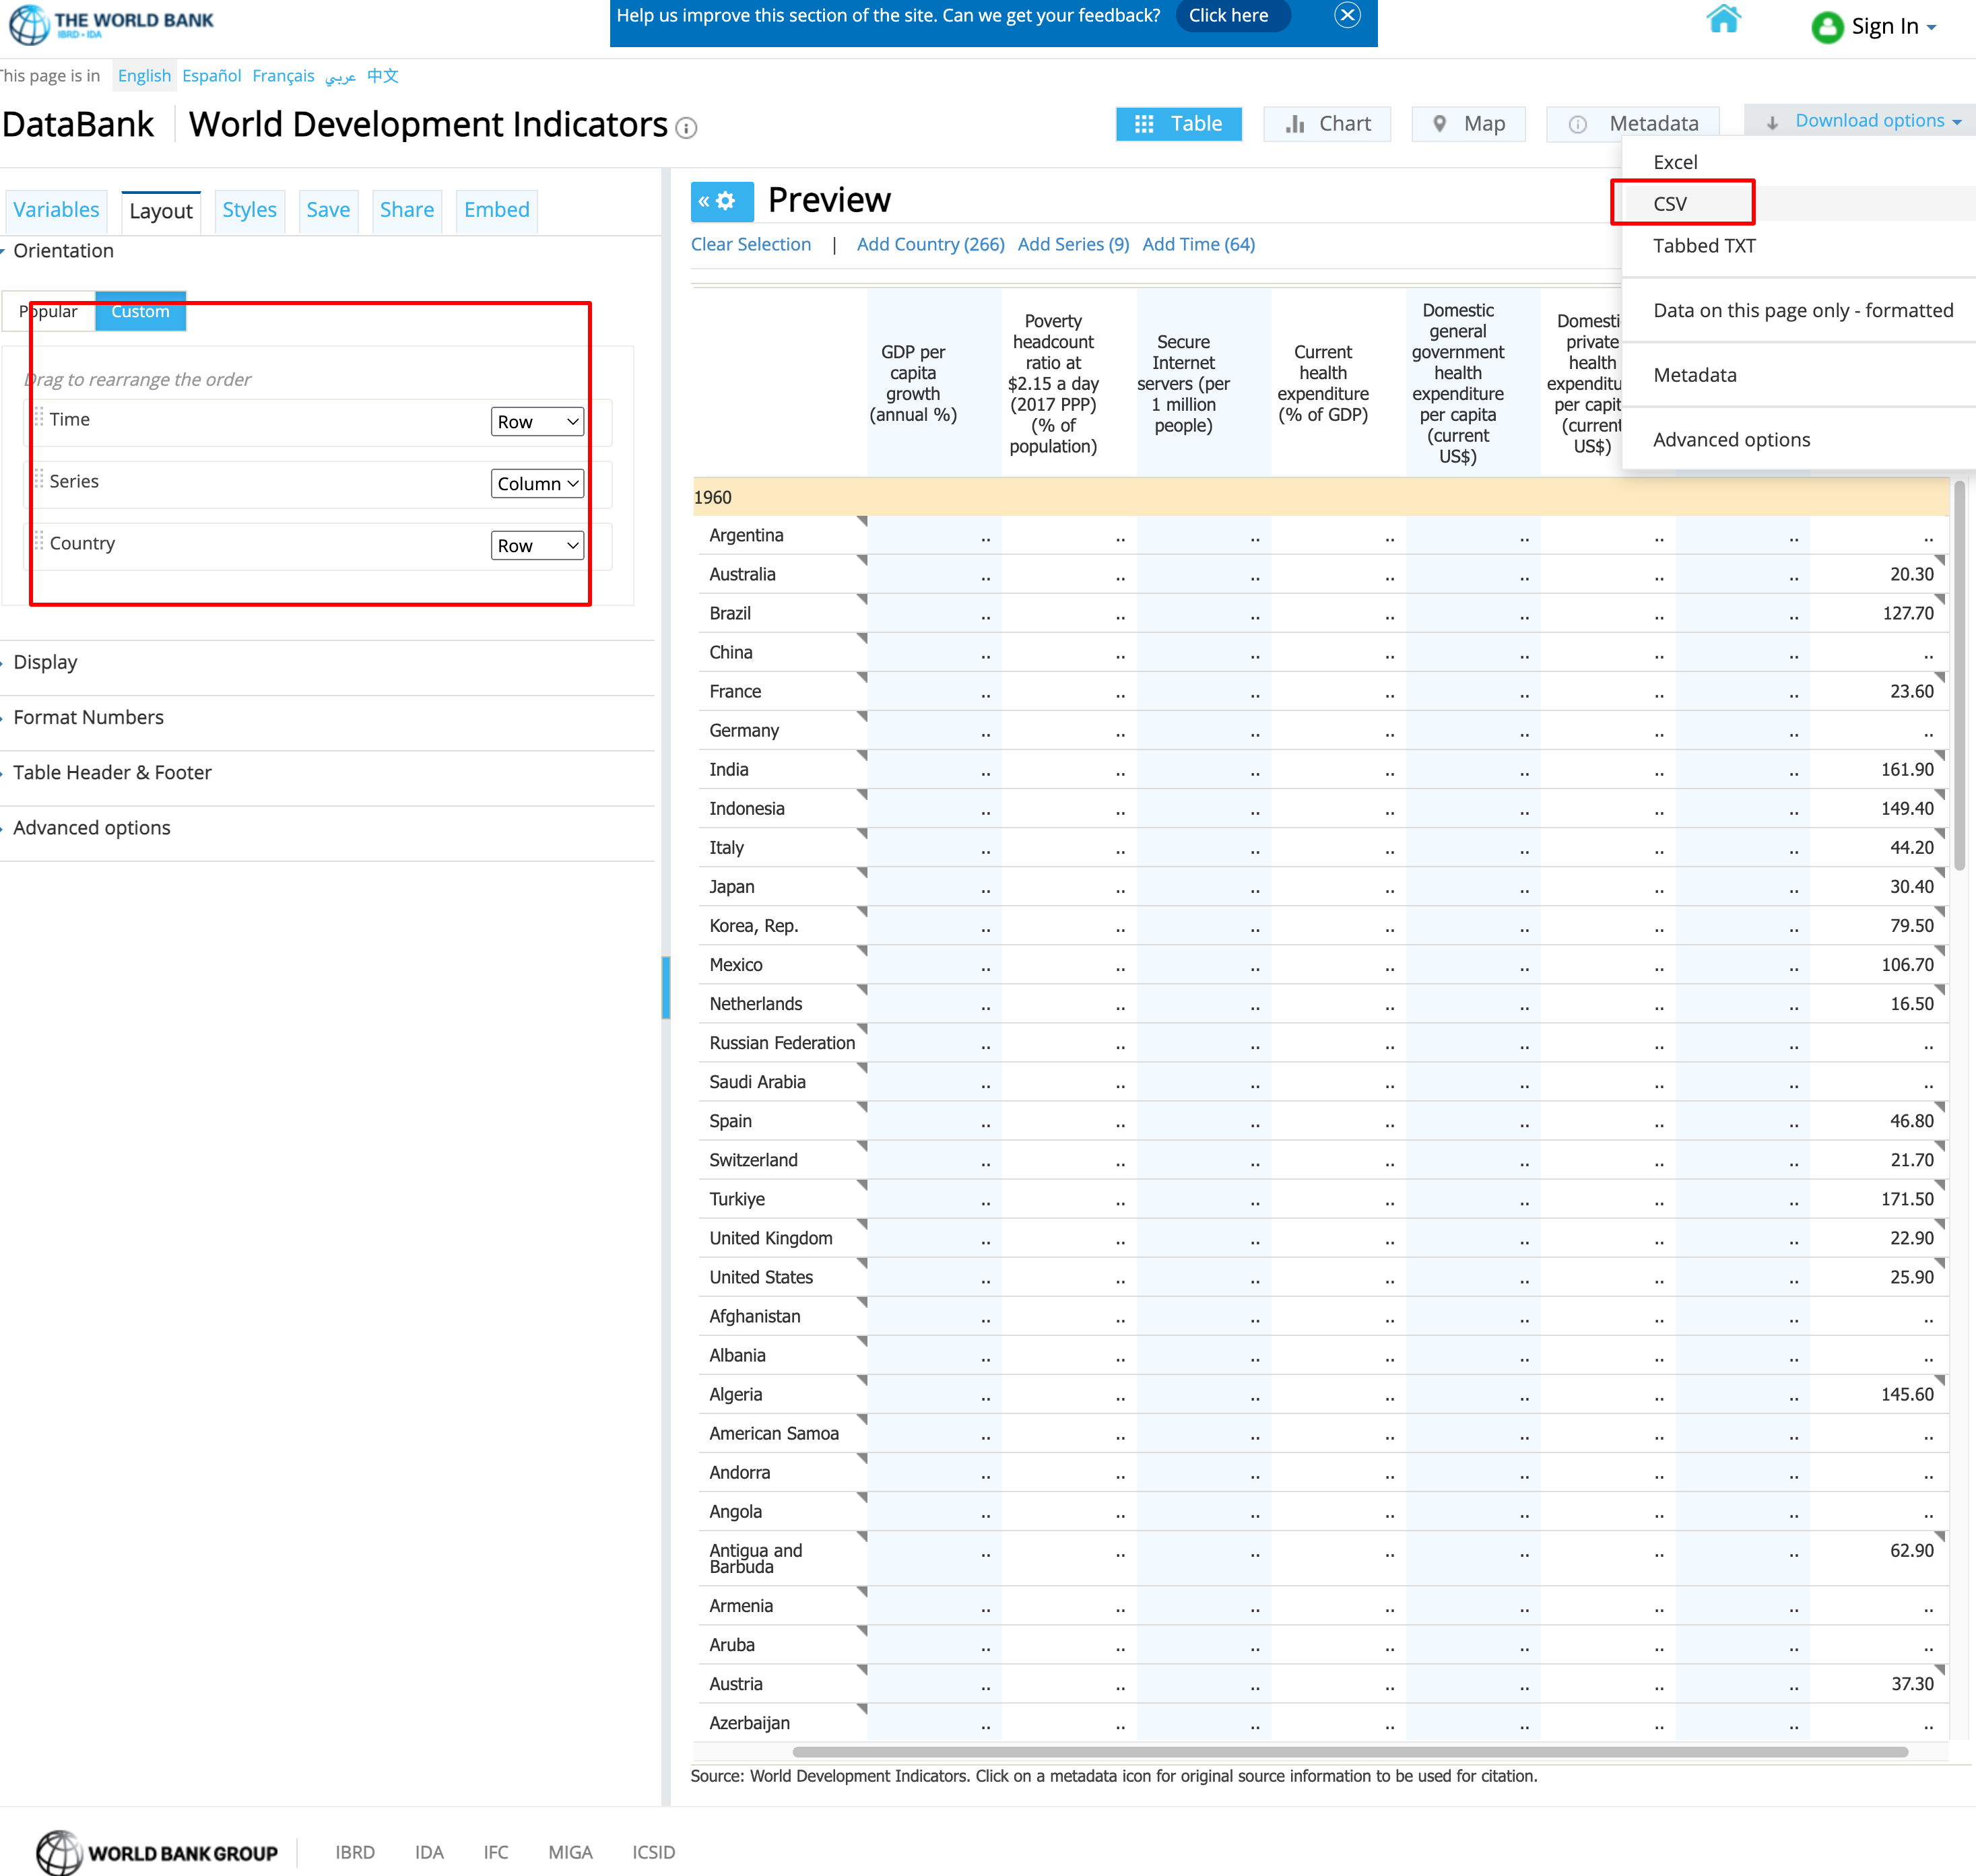

In [5]:
# THIS IS NOT APPLICABLE ANYMORE. EXTERNAL DATA IS FETCHED FROM THE SOURCE
# # Calculate median for numeric columns 
# median_values = economic_data[numeric_columns].median()


# # Fill missing values
# economic_data[numeric_columns] = economic_data[numeric_columns].fillna(median_values)

# # Drop rows where 'Country Name' or 'Country Code' is missing
# economic_data.dropna(subset=['Country Name', 'Country Code'], inplace=True)

# final_missing_values_pandas = economic_data.isnull().sum()
# final_data_preview_pandas = economic_data.head()

# final_missing_values_pandas

#### Loading economic data to OLTP database

The next step I choose was to load the cleaned data to OLTP so it can be queried during ETL process. Creating database named `olympic_oltp` to store all the data that was cleaned

In [6]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Parameters to connect to the default PostgreSQL database
params = {
    'dbname': 'postgres',
    'user': 'postgres',  
    'password': 'postgres', 
    'host': 'pgdb'
}

try:
    # Connect to the PostgreSQL server
    conn = psycopg2.connect(**params)
    
    # Enable autocommit so operations like creating a database are committed without having to call conn.commit()
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    
    # Create a cursor object
    cursor = conn.cursor()
    
    # Name of the new database
    new_db_name = 'olympic_oltp'  # Replace with the name of the database you want to create
    
    # Ensure the database name is safe to use
    # For example, by checking against a list of allowed names or patterns
    if not new_db_name.isidentifier():
        raise ValueError("Invalid database name.")
    
    # Create a new database using an f-string
    cursor.execute(f"CREATE DATABASE {new_db_name}")
    
    print("Database created successfully")
    
    # Close communication with the database
    cursor.close()
    conn.close()

except Exception as e:
    print(f"An error occurred: {e}")


Database created successfully


In [7]:

from psycopg2 import OperationalError
def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port,
        )
        print("Connection to PostgreSQL DB successful")
    except OperationalError as e:
        print(f"The error '{e}' occurred")
    return connection

In [8]:
# Connection details
db_name = "olympic_oltp"
db_user = "postgres"
db_password = "postgres" 
db_host = "pgdb" 
db_port = "5432"

# Create the connection
connection = create_connection(db_name, db_user, db_password, db_host, db_port)

Connection to PostgreSQL DB successful


In [9]:
# Rename the columns to match the PostgreSQL table schema exactly

economic_data.columns = [
    'time_year',
    'time_code',
    'country_name',
    'country_code',
    'poverty_ratio',  # Ratio of population at $2.15 a day PPP
    'gdp_per_capita_usd',  # GDP per capita in current US$
    'gdp_per_capita_growth',  # Annual growth of GDP per capita
    'secure_internet_servers_per_million',  # Secure Internet servers per million people
    'infant_mortality_rate',  # Infant mortality rate per 1,000 live births
    'health_expenditure_pct_gdp',  # Current health expenditure as % of GDP
    'gov_health_expenditure_per_capita_usd',  # Government health expenditure per capita in current US$
    'private_health_expenditure_per_capita_usd',  # Private health expenditure per capita in current US$
    'external_health_expenditure_per_capita_usd'  # External health expenditure per capita in current US$
]


In [91]:
economic_data

,Time,Time Code,Country Name,Country Code,GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY],Secure Internet servers (per 1 million people) [IT.NET.SECR.P6],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD],External health expenditure per capita (current US$) [SH.XPD.EHEX.PC.CD],"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]"
0,1960,YR1960,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,YR1960,Australia,AUS,1810.597443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3
2,1960,YR1960,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.7
3,1960,YR1960,China,CHN,89.520214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960,YR1960,France,FRA,1333.881573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,2023,YR2023,Sub-Saharan Africa,SSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17020,2023,YR2023,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17021,2023,YR2023,Sub-Saharan Africa (IDA & IBRD countries),TSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17022,2023,YR2023,Upper middle income,UMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

from sqlalchemy import create_engine

connection_url = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create the engine
engine = create_engine(connection_url)

create_economic_data_table_sql = """
CREATE TABLE IF NOT EXISTS economic_data (
    time_year VARCHAR(255),
    time_code VARCHAR(255),
    country_name VARCHAR(255),
    country_code VARCHAR(255),
    poverty_ratio FLOAT, -- Ratio of population at $2.15 a day PPP
    gdp_per_capita_usd FLOAT, -- GDP per capita in current US$
    gdp_per_capita_growth FLOAT, -- Annual growth of GDP per capita
    secure_internet_servers_per_million FLOAT, -- Secure Internet servers per million people
    infant_mortality_rate FLOAT, -- Infant mortality rate per 1,000 live births
    health_expenditure_pct_gdp FLOAT, -- Current health expenditure as % of GDP
    gov_health_expenditure_per_capita_usd FLOAT, -- Government health expenditure per capita in current US$
    private_health_expenditure_per_capita_usd FLOAT, -- Private health expenditure per capita in current US$
    external_health_expenditure_per_capita_usd FLOAT -- External health expenditure per capita in current US$
);
"""

cursor = connection.cursor()

cursor.execute(create_economic_data_table_sql)

connection.commit()
cursor.close()
connection.close()


I have loaded data into a table named `economic_data` in a SQL database, connecting through `engine` and ensuring that the DataFrame's index is not included as a column in the table.

In [12]:
economic_data.to_sql("economic_data", con=engine, if_exists="append", index=False)

200

In [13]:
# Save the cleaned data
economic_data.to_csv('cleaned_data/economic_data_external.csv', index=False)

#### 2. Global Population

The dataset consists of population estimates for various countries from 1980 to 2028, with some entries marked a`no data`. All the columns are currently read as objects (strings), which is typical when dealing with mixed data types like numbers and text.

In [14]:
global_population_data = pd.read_csv('./raw_data/Global Population.csv', encoding='ISO-8859-1')

In [15]:
global_population_data_info = global_population_data.info()
global_population_data_missing_values = global_population_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Population (Millions of people)  229 non-null    object
 1   1980                             228 non-null    object
 2   1981                             228 non-null    object
 3   1982                             228 non-null    object
 4   1983                             228 non-null    object
 5   1984                             228 non-null    object
 6   1985                             228 non-null    object
 7   1986                             228 non-null    object
 8   1987                             228 non-null    object
 9   1988                             228 non-null    object
 10  1989                             228 non-null    object
 11  1990                             228 non-null    object
 12  1991                             228

In [16]:
global_population_data_missing_values

Population (Millions of people)    2
1980                               3
1981                               3
1982                               3
1983                               3
1984                               3
1985                               3
1986                               3
1987                               3
1988                               3
1989                               3
1990                               3
1991                               3
1992                               3
1993                               3
1994                               3
1995                               3
1996                               3
1997                               3
1998                               3
1999                               3
2000                               3
2001                               3
2002                               3
2003                               3
2004                               3
2005                               3
2

In [17]:
global_population_data.replace('no data', np.nan, inplace=True)

# Convert data types for all year columns to float
for col in global_population_data.columns[1:]:  # Assuming the first column is Country Name
    global_population_data[col] = pd.to_numeric(global_population_data[col], errors='coerce')


- **Converted Numeric Columns**: All year columns now contain floating-point numbers or `NaN` for missing data.
- **Handled Missing Values**: Missing data is now uniformly represented with `NaN`, making it easier to perform aggregations and other data operations.

In [18]:
global_population_data.head()

,Population (Millions of people),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.200,32.941,33.698,34.263,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,2.672,2.726,2.784,2.844,2.904,2.965,3.023,3.084,3.142,...,2.881,2.878,2.873,2.866,2.858,2.850,2.840,2.831,2.821,2.810
3,Algeria,18.666,19.246,19.864,20.516,21.175,22.200,22.800,23.400,24.100,...,43.424,43.851,44.577,45.291,45.973,46.626,47.251,47.851,48.428,48.983
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.078,0.078,0.080,0.082,0.084,0.086,0.088,0.090,0.093,0.095


**Interpolation Method**: For population data, `linear interpolation` often makes sense as it assumes a gradual change between points. 




In [19]:
# Interpolate missing data for each country
global_population_data.iloc[:, 1:] = global_population_data.iloc[:, 1:].apply(lambda x: x.interpolate(method='linear', limit_direction='both'), axis=1)


In [20]:
global_population_data = global_population_data.rename(columns={'Population (Millions of people)': 'Population'})


Some rows have all the columns with NaN values which we don't required. We will drop them

In [21]:
# Select all columns except the first one for checking NaN values
condition = global_population_data.iloc[:, 1:].isna().all(axis=1)

# Drop rows based on the condition
global_population_data = global_population_data[~condition]



In [22]:
global_population_data

,Population,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Afghanistan,17.887,17.887,17.887,17.887,17.887,17.887,17.887,17.887,17.887,...,32.200,32.941,33.698,34.263,34.263,34.263,34.263,34.263,34.263,34.263
2,Albania,2.672,2.726,2.784,2.844,2.904,2.965,3.023,3.084,3.142,...,2.881,2.878,2.873,2.866,2.858,2.850,2.840,2.831,2.821,2.810
3,Algeria,18.666,19.246,19.864,20.516,21.175,22.200,22.800,23.400,24.100,...,43.424,43.851,44.577,45.291,45.973,46.626,47.251,47.851,48.428,48.983
4,Andorra,0.070,0.070,0.070,0.070,0.070,0.070,0.070,0.070,0.070,...,0.078,0.078,0.080,0.082,0.084,0.086,0.088,0.090,0.093,0.095
5,Angola,8.272,8.495,8.720,8.948,9.185,10.350,10.646,10.918,11.214,...,32.354,33.428,34.504,35.711,36.783,37.886,39.023,40.194,41.399,42.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Major advanced economies (G7),612.155,616.177,619.745,623.047,626.158,629.495,633.018,636.492,640.455,...,767.111,770.236,771.188,773.813,776.204,778.064,779.836,781.511,783.115,784.666
225,Middle East and Central Asia,254.673,262.850,271.095,279.549,288.557,297.650,306.682,314.912,323.543,...,822.958,838.452,852.037,867.872,848.600,863.738,879.116,894.740,910.628,926.964
226,Other advanced economies,112.560,114.089,115.636,117.012,118.267,119.403,120.510,121.721,123.038,...,173.316,173.729,173.571,174.874,175.992,176.883,177.651,178.412,179.175,179.940
227,Sub-Saharan Africa,342.745,352.398,362.565,373.099,384.021,395.902,407.207,418.858,430.534,...,1026.814,1054.129,1081.266,1108.902,1137.025,1165.892,1195.365,1225.766,1257.372,1289.432


In [23]:
global_population_data.columns

Index(['Population', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028'],
      dtype='object')

In [24]:
# Create table using the SQL statement defined above
create_population_data_table_sql = """
CREATE TABLE population_data (
    "Population" TEXT,
    -- Add columns for each year
    "1980" FLOAT, "1981" FLOAT, "1982" FLOAT, "1983" FLOAT, "1984" FLOAT, "1985" FLOAT, "1986" FLOAT,
    "1987" FLOAT, "1988" FLOAT, "1989" FLOAT, "1990" FLOAT, "1991" FLOAT, "1992" FLOAT, "1993" FLOAT,
    "1994" FLOAT, "1995" FLOAT, "1996" FLOAT, "1997" FLOAT, "1998" FLOAT, "1999" FLOAT, "2000" FLOAT,
    "2001" FLOAT, "2002" FLOAT, "2003" FLOAT, "2004" FLOAT, "2005" FLOAT, "2006" FLOAT, "2007" FLOAT,
    "2008" FLOAT, "2009" FLOAT, "2010" FLOAT, "2011" FLOAT, "2012" FLOAT, "2013" FLOAT, "2014" FLOAT,
    "2015" FLOAT, "2016" FLOAT, "2017" FLOAT, "2018" FLOAT, "2019" FLOAT, "2020" FLOAT, "2021" FLOAT,
    "2022" FLOAT, "2023" FLOAT, "2024" FLOAT, "2025" FLOAT, "2026" FLOAT, "2027" FLOAT, "2028" FLOAT
);
"""

In [25]:
connection = create_connection(db_name, db_user, db_password, db_host, db_port)
cursor = connection.cursor()
# Execute the SQL statement
cursor.execute(create_population_data_table_sql)


connection.commit()
cursor.close()
connection.close()

Connection to PostgreSQL DB successful


#### Loading population data to OLTP for ETL process

In [26]:
global_population_data.to_sql("population_data", con=engine, if_exists="append", index=False)

228

In [27]:
# Save the cleaned data
global_population_data.to_csv('cleaned_data/Global Population.csv', index=False)

#### 3. Life Expectancy 

In [28]:
life_expectancy_path = './raw_data/life-expectancy.csv'

life_expectancy_data = pd.read_csv(life_expectancy_path)

In [29]:
life_expectancy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               20755 non-null  object 
 1   Code                                                 19061 non-null  object 
 2   Year                                                 20755 non-null  int64  
 3   Period life expectancy at birth - Sex: all - Age: 0  20755 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 648.7+ KB


In [30]:
life_expectancy_data.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [31]:
life_expectancy_data.columns

Index(['Entity', 'Code', 'Year',
       'Period life expectancy at birth - Sex: all - Age: 0'],
      dtype='object')

In [32]:
# Renamed the column name to make them consistent across and avoiding large column name

life_expectancy_data = life_expectancy_data.rename(columns={'Period life expectancy at birth - Sex: all - Age: 0': 'life_expectancy', 'Entity':'entity', 'Code': 'country_code', 'Year': 'year'})

In [33]:
life_expectancy_data.columns

Index(['entity', 'country_code', 'year', 'life_expectancy'], dtype='object')

In [34]:
# Create table using the SQL statement defined above
create_life_expectancy_table_query = """
CREATE TABLE life_expectancy_data (
    entity TEXT,
    country_code VARCHAR(250),
    year INT,
    life_expectancy FLOAT
);
"""

connection = create_connection(db_name, db_user, db_password, db_host, db_port)
cursor = connection.cursor()

# Execute the SQL statement
cursor.execute(create_life_expectancy_table_query)
connection.commit()

cursor.close()
connection.close()

Connection to PostgreSQL DB successful


#### Loading life expectancy data to OLTP

In [35]:
life_expectancy_data.to_sql("life_expectancy_data", con=engine, if_exists="append", index=False)

755

**Optional**

Because, the data contains some regions which does not have region code, I will create 2 CSV file, one with country and other with regions. 

We can split the single source CSV into two separate CSV files:

1. **Countries CSV**: This will include entries that have a country code and will retain the original country code in the data.
2. **Regions CSV**: This will include entries that originally did not have a country code. These entries will be identified as regions and will not include any code.

In [36]:
# Filter out countries with country code
countries = life_expectancy_data.dropna(subset=['country_code'])

# Filter out regions (entries without a country code)
regions = life_expectancy_data[life_expectancy_data['country_code'].isnull()].copy()
regions.drop('country_code', axis=1, inplace=True)  # Optionally remove the 'Code' column

In [37]:
# Save the datasets to new CSV files
countries.to_csv('./cleaned_data/life-expectancy-countries.csv', index=False)
regions.to_csv('./cleaned_data/life-expectancy-regions.csv', index=False)

#### 4. Mental Illness**

The `mental-illness.csv` file contains the following columns:

- **Entity**: Name of the country or region.
- **Code**: The international standard code for the country; some are missing, indicating regions.
- **Year**: Year of the data.
- Several columns related to **DALYs (Disability-Adjusted Life Years)** for different mental health disorders, all age-standardized and for both sexes.



In [38]:
# Load the CSV file to examine its contents and structure
mental_illness_data_path = './raw_data/mental-illness.csv'
mental_illness_data = pd.read_csv(mental_illness_data_path)

# Display the first few rows of the dataframe and summary of the data
mental_illness_data.head()

,Entity,Code,Year,"DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized","DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized","DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized","DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized","DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized"
0,Afghanistan,AFG,1990,895.22565,138.24825,147.64412,26.471115,440.33000
1,Afghanistan,AFG,1991,893.88434,137.76122,147.56696,25.548681,439.47202
2,Afghanistan,AFG,1992,892.34973,137.08030,147.13086,24.637949,437.60718
3,Afghanistan,AFG,1993,891.51587,136.48602,146.78812,23.863169,436.69104
4,Afghanistan,AFG,1994,891.39160,136.18323,146.58481,23.189074,436.76800


In [39]:
mental_illness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Entity                                                                                   6840 non-null   object 
 1   Code                                                                                     6150 non-null   object 
 2   Year                                                                                     6840 non-null   int64  
 3   DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized  6840 non-null   float64
 4   DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized         6840 non-null   float64
 5   DALYs from bipolar disorder per 100,000 people in, both sexes a

In [40]:
mental_illness_data.columns

Index(['Entity', 'Code', 'Year',
       'DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized',
       'DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized',
       'DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized',
       'DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized',
       'DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized'],
      dtype='object')

In [41]:
mental_illness_data.columns = [
    'entity',
    'country_code',
    'year',
    'daly_depression',
    'daly_schizophrenia', 
    'daly_bipolar_disorder', 
    'daly_eating_disorder', 
    'daly_anxiety'
]

In [42]:
mental_illness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entity                 6840 non-null   object 
 1   country_code           6150 non-null   object 
 2   year                   6840 non-null   int64  
 3   daly_depression        6840 non-null   float64
 4   daly_schizophrenia     6840 non-null   float64
 5   daly_bipolar_disorder  6840 non-null   float64
 6   daly_eating_disorder   6840 non-null   float64
 7   daly_anxiety           6840 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 427.6+ KB


In [43]:
create_mental_illness_table_query = """
    CREATE TABLE mental_health_data (
        entity TEXT,
        country_code VARCHAR(250),
        year INT,
        daly_depression FLOAT,
        daly_schizophrenia FLOAT,
        daly_bipolar_disorder FLOAT,
        daly_eating_disorder FLOAT,
        daly_anxiety FLOAT
    );
    """

In [44]:
connection = create_connection(db_name, db_user, db_password, db_host, db_port)
cursor = connection.cursor()

cursor.execute(create_mental_illness_table_query)

connection.commit()
cursor.close()
connection.close()

Connection to PostgreSQL DB successful


In [45]:
mental_illness_data.to_sql("mental_health_data", con=engine, if_exists="append", index=False)

840


1. **Countries CSV**: This file will contain entries with country codes. It will retain the original country code.
2. **Regions CSV**: This file will contain entries that originally did not have a country code. These entries will be identified as regions, and the 'Code' column will be dropped.

In [46]:
# Filter out countries with country code
countries_mental = mental_illness_data.dropna(subset=['country_code'])

# Filter out regions (entries without a country code)
regions_mental = mental_illness_data[mental_illness_data['country_code'].isnull()].copy()
regions_mental.drop('country_code', axis=1, inplace=True)  # Remove the 'country_code' column

# Save the datasets to new CSV files
countries_mental_file = './cleaned_data/mental-illness-countries.csv'
regions_mental_file = './cleaned_data/mental-illness-regions.csv'
countries_mental.to_csv(countries_mental_file, index=False)
regions_mental.to_csv(regions_mental_file, index=False)

countries_mental_file, regions_mental_file


('./cleaned_data/mental-illness-countries.csv',
 './cleaned_data/mental-illness-regions.csv')

#### 5. Olympic Hosts**

The `olympic_hosts.csv` file contains information about various Olympic Games, and from the initial inspection, the data appears well-structured with the following columns:

- **game_slug**: A unique identifier for each Olympic event.
- **game_end_date**: The end date of the event in an ISO 8601 format.
- **game_start_date**: The start date of the event in an ISO 8601 format.
- **game_location**: The location (country) of the event.
- **game_name**: The name of the Olympic event.
- **game_season**: Specifies whether the games are Summer or Winter Olympics.
- **game_year**: The year the games were held.

### Observations and Possible Data Cleaning Steps:
1. **Date Format**: The start and end dates are in ISO 8601 format with time components.
   
   - Convert these date strings to a standard Python `datetime` object for easier manipulation and extraction of specific date components (e.g., just the date without the time).
   - Extract just the date part if the time component is not relevant.

3. **Consistency in Game Location Names**: It might be helpful to ensure that all entries under `game_location` are consistently formatted or spelled, particularly for countries that might have undergone name changes or different spelling conventions over the years.


### Example Cleaning Process:
cleaning the date formats by converting the start and end dates to just include the date part, ensuring we have consistent datetime formats. (Optional). Left here for reference.

```python
from datetime import datetime

# Convert date columns to datetime
olympic_hosts_data['game_start_date'] = pd.to_datetime(olympic_hosts_data['game_start_date']).dt.date
olympic_hosts_data['game_end_date'] = pd.to_datetime(olympic_hosts_data['game_end_date']).dt.date

# Example of checking for consistent formatting in 'game_location'
print(olympic_hosts_data['game_location'].unique())
```

In [47]:

olympic_host_data_path = './raw_data/olympic_hosts.csv'

olympic_host_data = pd.read_csv(olympic_host_data_path)

In [48]:
olympic_host_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [49]:
olympic_host_data.columns

Index(['game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year'],
      dtype='object')

In [50]:
from datetime import datetime

# Convert date columns to datetime
olympic_host_data['game_start_date'] = pd.to_datetime(olympic_host_data['game_start_date']).dt.date
olympic_host_data['game_end_date'] = pd.to_datetime(olympic_host_data['game_end_date']).dt.date

In [51]:
olympic_host_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [52]:
create_olympic_hosts_table_query = """
CREATE TABLE olympic_hosts (
    game_slug TEXT,
    game_end_date DATE,
    game_start_date DATE,
    game_location TEXT,
    game_name TEXT,
    game_season TEXT,
    game_year INT
);
"""

In [53]:
connection = create_connection(db_name, db_user, db_password, db_host, db_port)
cursor = connection.cursor()

cursor.execute(create_olympic_hosts_table_query)
connection.commit()  # Commit the changes

cursor.close()
connection.close()

Connection to PostgreSQL DB successful


In [54]:
olympic_host_data.to_sql("olympic_hosts", con=engine, if_exists="append", index=False)

53

#### 6. Olympic Medals

In [55]:
# Load the newly uploaded CSV file to examine its contents and structure
olympic_medals_data_path = './raw_data/olympic_medals.csv'
olympic_medals_data = pd.read_csv(olympic_medals_data_path)


In [56]:
olympic_medals_data.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [57]:
olympic_medals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [58]:
olympic_medals_data_missing_values = olympic_medals_data.isnull().sum()

In [59]:
olympic_medals_data_missing_values

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64


### Cleaning Steps

1. **Missing Values**:
   - **Participant Title**: Only team event has participant title. Seperate dimension 
   - **Athlete URL & Full Name**: Only individual event has athlete name. Seperate dimension with athlete and url
   - **Country Code**: Drop `country_name` as they are not quite standard. 3 character will be used for consistency

2. **Consistency and Accuracy**:
   - **Check for Consistent Capitalization**: Columns like `country_name`, `event_title`, and `athlete_full_name` should have consistent capitalization to avoid duplications due to case differences.
   - **Validate Country Codes**: Ensure that `country_code` and `country_3_letter_code` are consistent and correctly mapped to `country_name`.


In [60]:
create_olympic_medals_table_query = """
CREATE TABLE olympic_medals (
    discipline_title TEXT,
    slug_game TEXT,
    event_title TEXT,
    event_gender VARCHAR(250),
    medal_type TEXT,
    participant_type TEXT,
    participant_title TEXT,
    athlete_url TEXT,
    athlete_full_name TEXT,
    country_name TEXT,
    country_code VARCHAR(10),
    country_3_letter_code VARCHAR(10)
);
"""

In [61]:
connection = create_connection(db_name, db_user, db_password, db_host, db_port)
cursor = connection.cursor()

Connection to PostgreSQL DB successful


In [62]:

cursor.execute(create_olympic_medals_table_query)
connection.commit()  # Commit the changes
cursor.close()
connection.close()

In [63]:
olympic_medals_data.to_sql("olympic_medals", con=engine, if_exists="append", index=False)

697

#### 7. List of countries

Since, there are lot of name mismatch, I used standard names from https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes standard names from wikipedia

I loaded the external data which has details about names and continents from the url below. 
https://statisticstimes.com/geography/countries-by-continents.php

After downloading the json from the source (https://statisticstimes.com/m/geography/json/countries-continents.json) above, I loaded them into OLTP database. 

In [64]:
# Read the JSON file into a pandas DataFrame
countries_data_path = './raw_data/countries-continents.json'
countries_df = pd.read_json(countries_data_path)

# Display the DataFrame to confirm the contents
countries_df.head()


,id,name,M49 code,ISO alpha3 code,continent,region,color
0,AF,Afghanistan,4,AFG,Asia,Southern Asia,#00CC99
1,AX,Åland Islands,248,ALA,Europe,Northern Europe,#99CCFF
2,AL,Albania,8,ALB,Europe,Southern Europe,#8AB8E6
3,DZ,Algeria,12,DZA,Africa,Northern Africa,#2EB82E
4,AS,American Samoa,16,ASM,Oceania,Polynesia,#B88A00


In [65]:
countries_df = countries_df.drop(['color', 'id', 'M49 code', 'region'], axis=1)

In [66]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             248 non-null    object
 1   ISO alpha3 code  248 non-null    object
 2   continent        248 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [67]:
countries_df.columns = [ "country_name", "country_code", "continent"]

In [68]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  248 non-null    object
 1   country_code  248 non-null    object
 2   continent     248 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [69]:
create_countries_table_query = """
CREATE TABLE countries (
   country_code CHAR(3) PRIMARY KEY,
   country_name VARCHAR(250) NOT NULL,
   continent VARCHAR(250) NOT NULL
);
"""

In [70]:
connection = create_connection(db_name, db_user, db_password, db_host, db_port)
cursor = connection.cursor()

Connection to PostgreSQL DB successful


In [71]:
cursor.execute(create_countries_table_query)
connection.commit()  # Commit the changes
cursor.close()
connection.close()

In [72]:
countries_df.to_sql("countries", con=engine, if_exists="append", index=False)

248